In [0]:
import tensorflow as tf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
kmeans = KMeans(n_clusters=1, random_state=0).fit(X_test.reshape((10000,28*28)))

In [4]:
kmeans.inertia_

34364573698.59141

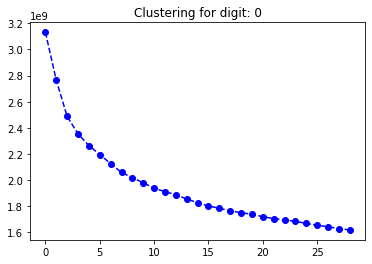

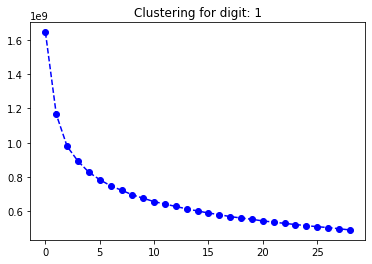

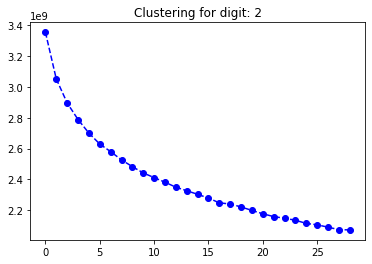

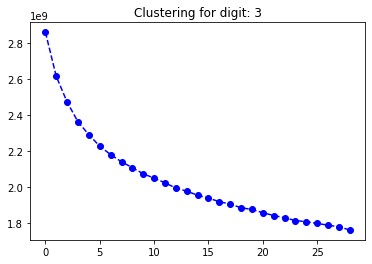

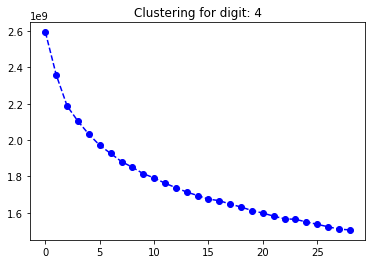

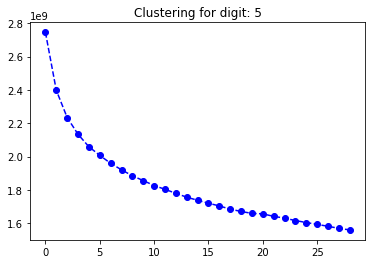

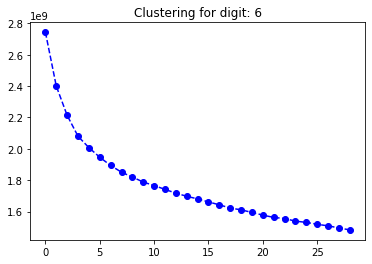

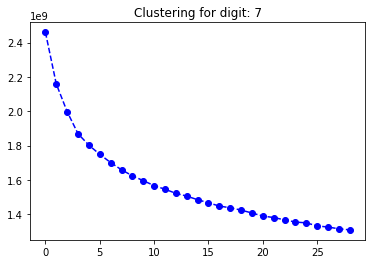

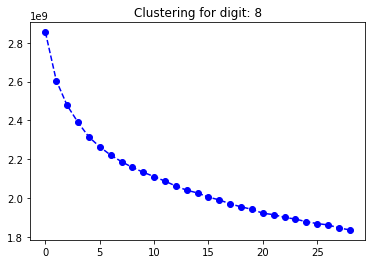

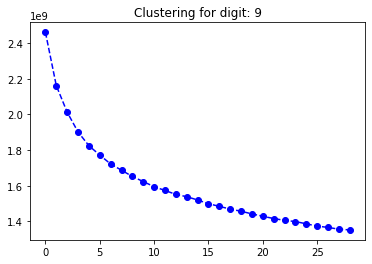

In [5]:
for sample in range(10):
  samples = X_test[y_test==sample]
  inertias = []
  samples = samples.reshape((samples.shape[0],28*28))
  plt.figure()
  for i in range(1,30): 
    kmeans = KMeans(n_clusters=i, random_state=0).fit(samples)
    inertias.append(kmeans.inertia_)
  plt.plot(inertias,'--bo')
  plt.title('Clustering for digit: ' + str(sample))
  plt.show()

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

def sample_test_set(percentage,X_test,imsize,channels,num_clusters, num_classes,num_samples):
  original = []
  adversarial = []
  for sample_class in range(num_classes):
    samples = X_test[(y_test==sample_class).reshape(num_samples)]
    samples = samples.reshape((samples.shape[0],imsize*imsize*channels))
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit_predict(samples)
    for cluster in range(num_clusters):
      subsamples = np.where(kmeans==cluster)[0]
      ori, adv = train_test_split(subsamples,random_state=0, test_size = percentage ,shuffle=True)
      original.extend(samples[ori])
      adversarial.extend(samples[adv])
  return original, adversarial


In [0]:
ori,adv = sample_test_set(0.1,X_test,28,1,5,10,10000)

In [8]:
print(len(ori),len(adv))

8979 1021


In [9]:
np.sum(X_test)

264923200

In [10]:
np.sum(ori)  + np.sum(adv)

264923200